In [1]:
import numpy as np  
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
df11 = pd.read_csv('subject101.csv',delimiter=',')
df12 = pd.read_csv('subject102.csv',delimiter=',')
df13 = pd.read_csv('subject103.csv',delimiter=',')
df14 = pd.read_csv('subject104.csv',delimiter=',')
df15 = pd.read_csv('subject105.csv',delimiter=',')
df16 = pd.read_csv('subject106.csv',delimiter=',')
df17 = pd.read_csv('subject107.csv',delimiter=',')
df18 = pd.read_csv('subject108.csv',delimiter=',')
df19 = pd.read_csv('subject109.csv',delimiter=',')
df21 = pd.read_csv('subject201.csv',delimiter=',')
df25 = pd.read_csv('subject205.csv',delimiter=',')
df26 = pd.read_csv('subject206.csv',delimiter=',')
df28 = pd.read_csv('subject208.csv',delimiter=',')
df29 = pd.read_csv('subject209.csv',delimiter=',')
df = pd.concat([df11,df12,df13,df14,df15,df16,df17,df18,df19,df21,df25,df26,df28,df29])
from sklearn.model_selection import train_test_split
X = df.iloc[:,2:]
y = df.iloc[:,1]
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2, shuffle = True,stratify=y)
def norm(df):
    df_norm = (df - df.mean()) / (df.max() - df.min())
    return df_norm
X_train = norm(X_train)
X_test = norm(X_test)
clf = svm.LinearSVC(penalty='l1',dual=False,C=40)


clf.fit(X_train,y_train)
print clf
print clf.score(X_test,y_test)

LinearSVC(C=40, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)
0.7127310359253639


In [2]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from scipy import interp


y_true = y_test
y_pred = clf.predict(X_test)



print("misclassification")
print(1-clf.score(X_test,y_test))

[[36588   100   612   213     0     4     0    15   526     2     9     0
    168   177    19    39     0    33]
 [ 1541 25796  1530   145   122    13    57     4  2526     0     1   364
    589  4132    26   192     0     0]
 [    5  1212 27939  1365    93     0   572    42   299     0    15    28
    357  4793    37  1147     0    82]
 [   48    68  1034 40748    22   366  2131    15    10     9   412   132
   1146  1374    42   195     0     0]
 [   25   269   126  1245 12970   816  1034     7   258     8   589   783
    149   153     9   210   275   714]
 [    0     0     2   439   169 30397   387     0    16     0   270   299
    344   324     9    94   170     0]
 [   10   280   167 10671   958  1960 18812     3   204    18  1561   753
    290   696    83  1081    18    56]
 [    0     0     0    19     0     0    31 16454     0     0     0     2
    100     2     0   121     0     0]
 [  192    25   719     1     0    10     6     0 60746     0     0     0
     93    52     1   

In [5]:
from itertools import cycle
y_test = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24])
y_score = clf.decision_function(X_test)
classes=[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]
n_classes = len(classes)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[classes[i]], tpr[classes[i]], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[classes[i]] = auc(fpr[classes[i]], tpr[classes[i]])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[classes[i]] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[classes[i]], tpr[classes[i]])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

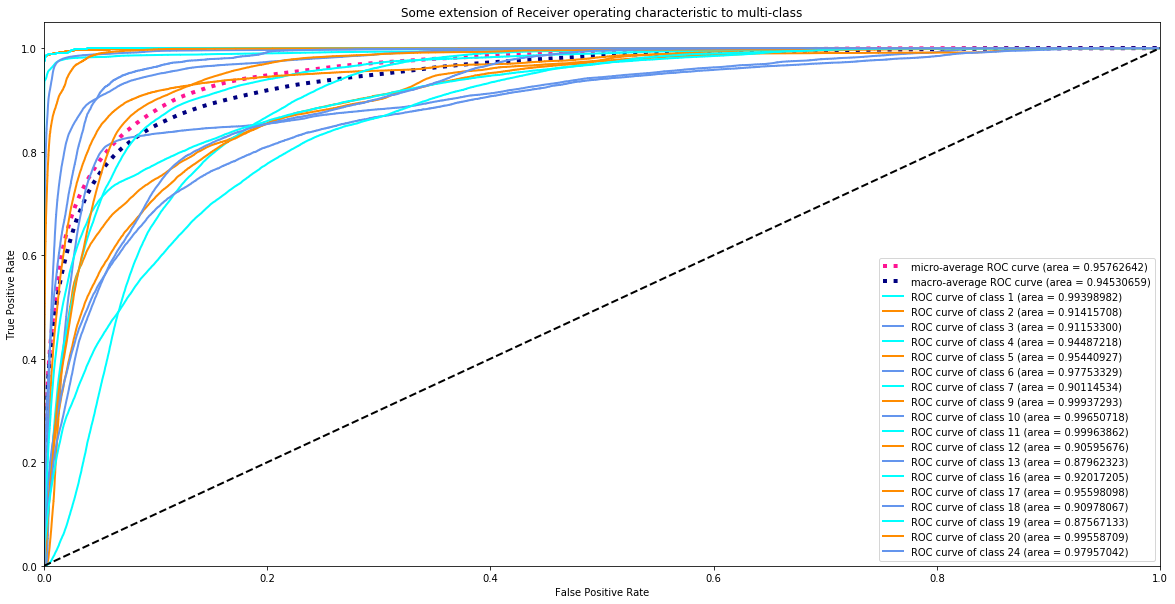

In [6]:
# Plot all ROC curves
plt.figure(figsize=(20,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.8f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.8f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[classes[i]], tpr[classes[i]], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.8f})'
             ''.format(classes[i], roc_auc[classes[i]]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



In [18]:
[[36588   100   612   213     0     4     0    15   526     2     9     0    168   177    19    39     0    33]
 [ 1541 25796  1530   145   122    13    57     4  2526     0     1   364    589  4132    26   192     0     0]
 [    5  1212 27939  1365    93     0   572    42   299     0    15    28    357  4793    37  1147     0    82]
 [   48    68  1034 40748    22   366  2131    15    10     9   412   132   1146  1374    42   195     0     0]
 [   25   269   126  1245 12970   816  1034     7   258     8   589   783    149   153     9   210   275   714]
 [    0     0     2   439   169 30397   387     0    16     0   270   299    344   324     9    94   170     0]
 [   10   280   167 10671   958  1960 18812     3   204    18  1561   753    290   696    83  1081    18    56]
 [    0     0     0    19     0     0    31 16454     0     0     0     2    100     2     0   121     0     0]
 [  192    25   719     1     0    10     6     0 60746     0     0     0     93    52     1    35     0   107]
 [    8     0     1     0     2     0     0     0     0 10691     0     4      0   138    29    31     0     0]
 [  138   217  1486  4678  1147   507  1015    32     8    17  9158  1308   2447   518     7   654     2   104]
 [  166   328  1067  5390   850  1208  1430     6   121    29  1832  5901   1110   868    98   558    15    12]
 [   19   661  1646  1334   457   888   241     3     7     7   781   43   24151  3046    52  1340     0     4]
 [    0   736  2444   527     6   121     1     4    71     1     2    36    171 41732   766  1119     0     1]
 [   41   354  1535   387     1   178    27    11   171     5    20    36    555  8546  3092  5016     0     0]
 [  163  2900  2955   380    61  1316    41    51  3132   230   481   549   7393  4105   742 12844     0    95]
 [   15    34    11   669   562   724   280     0    58     9   162    65     31    30     1     1  6447   284]
 [   19   349    13   160  2644   703   664     2    20     7   294    70     88    24     0   232   617  3966]]

SyntaxError: invalid syntax (<ipython-input-18-a281b61bb745>, line 1)